In [187]:
# Part 0
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
accuracy_score,
confusion_matrix,
ConfusionMatrixDisplay,
f1_score,
classification_report,
)


# This is the file path for the complete banking data csv
bank_file_path = "../data/bank/bank-full.csv"
def replace_unknown_with_nan(data_frame):
    data_frame_clean = data_frame.copy()

    # Replace 'unknown' with NaN for all columns
    data_frame_clean = data_frame_clean.replace('unknown', np.nan)
    print("\n\n")
    # Print summary of NaN values per column
    nan_summary = data_frame_clean.isna().sum()
    # Calculate percentage of NaN values
    nan_percentage = (data_frame_clean.isna().sum() /
                      len(data_frame_clean) * 100).round(2)
    return data_frame_clean


def print_message(arg0, arg1):
    print(arg0)
    print(arg1[arg1 > 0])

    print("\n\n")

# This is the Data Set we are going to make the Analysis
bank_data = pd.read_csv(bank_file_path, sep=";")
bank_data_clean = replace_unknown_with_nan(bank_data)

In [188]:
# Naïve Bayes classifier
def encode_categorical_columns(data_frame, columns):
    category_mappings = {}
    
    # Encode each specified column
    for col in columns:
        data_frame[col], categories = pd.factorize(data_frame[col], sort=True)
        
        category_mappings[col] = dict(zip(categories, range(len(categories))))
    
    # If you need to read the mapping
    return category_mappings

categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
# Drop all the Null Values 
bank_data_clean.dropna(inplace=True)


In [189]:
encode_categorical_columns(bank_data_clean,categorical_columns)

# Set the X and y
y = bank_data_clean.y
X = bank_data_clean.drop(['y'], axis= 1)

print(bank_data_clean)

       age  job  marital  education  default  balance  housing  loan  contact  \
24060   33    0        1          2        0      882        0     0        1   
24062   42    0        2          1        0     -247        1     1        1   
24064   33    7        1          1        0     3444        1     0        1   
24072   36    4        1          2        0     2415        1     0        1   
24077   36    4        1          2        0        0        1     0        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45199   34    1        2          1        0     1475        1     0        0   
45201   53    4        1          2        0      583        0     0        0   
45204   73    5        1          1        0     2850        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45210   37    2        1          1        0     2971        0     0        0   

       day  month  duration

In [190]:
def nivebase_bayes_classifier(X_train,X_test,y_train,y_test):
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    y_pred = gnb.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")
    print("The accuracy of my Naive Bayes Model is:", accuracy)
    print("The F1 Score of my Naive Bayes Model is:", f1)
    
    print("")
    return accuracy, f1

def train_and_test_data(X, y,test_size,train_size,number_of_loops):
    f1_list = []
    accuracy_scores_list = []

    for index in range(number_of_loops):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size,train_size=train_size, random_state=index)
        accuracy, f1 = nivebase_bayes_classifier(X_train, X_test, y_train, y_test)
        
        f1_list.append(f1)
        accuracy_scores_list.append(accuracy)
    
    return f1_list,accuracy_scores_list
    
f1_list_70train_30test,accuracy_scores_list_70train_30test = train_and_test_data(X,y,test_size=0.7,train_size=0.3,number_of_loops=10)



The accuracy of my Naive Bayes Model is: 0.807832422586521
The F1 Score of my Naive Bayes Model is: 0.8028292628473486

The accuracy of my Naive Bayes Model is: 0.8142076502732241
The F1 Score of my Naive Bayes Model is: 0.8127617688559173

The accuracy of my Naive Bayes Model is: 0.7989071038251366
The F1 Score of my Naive Bayes Model is: 0.7892208615247961

The accuracy of my Naive Bayes Model is: 0.8052823315118397
The F1 Score of my Naive Bayes Model is: 0.8000397802906557

The accuracy of my Naive Bayes Model is: 0.7941712204007286
The F1 Score of my Naive Bayes Model is: 0.7858629287053994

The accuracy of my Naive Bayes Model is: 0.8034608378870673
The F1 Score of my Naive Bayes Model is: 0.7970106567179929

The accuracy of my Naive Bayes Model is: 0.8063752276867031
The F1 Score of my Naive Bayes Model is: 0.8008632116003586

The accuracy of my Naive Bayes Model is: 0.8081967213114755
The F1 Score of my Naive Bayes Model is: 0.8088056462071546

The accuracy of my Naive Bayes Mo

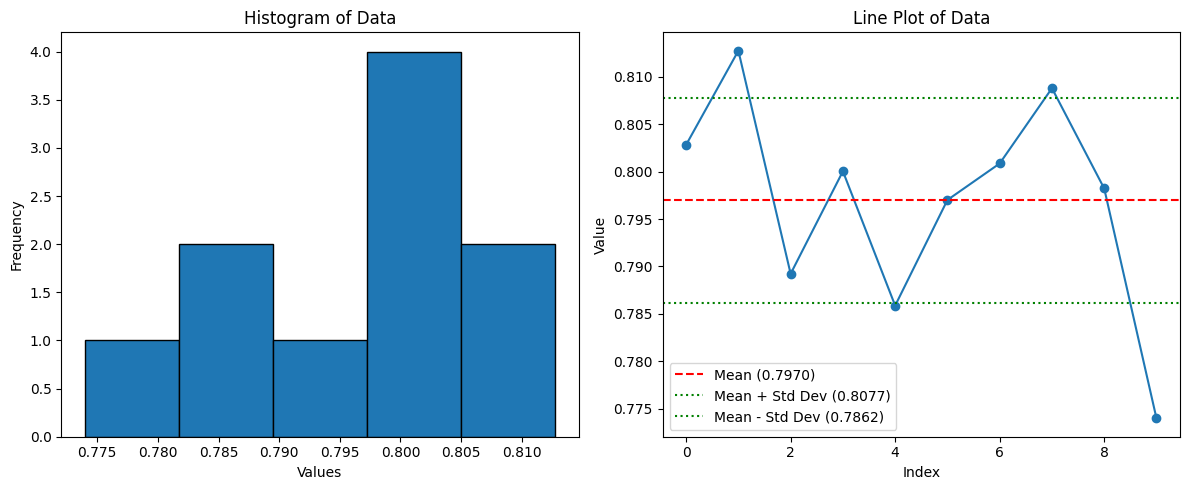

Average: 0.7969587378775663
Standard Deviation: 0.010781445727076682
Minimum Value: 0.7739692909195164
Maximum Value: 0.8127617688559173


In [191]:
# Part 2
# We need to find the average and standard deviation for F1- scores
# For this I have already stored the f1 scores in the f1_score_list

def find_the_f1_score_mean_and_standard_diviation(f1_list):
    plt.figure(figsize=(12, 5))
    # Histogram subplot
    plt.subplot(1, 2, 1)
    plt.hist(f1_list, bins=5, edgecolor='black')
    plt.title('Histogram of Data')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    # Line plot subplot
    plt.subplot(1, 2, 2)
    plt.plot(range(len(f1_list)), f1_list, marker='o')
    plt.title('Line Plot of Data')
    plt.xlabel('Index')
    plt.ylabel('Value')

    # Add horizontal lines for mean and standard deviation of the f1 score
    mean = np.mean(f1_list)
    std_dev = np.std(f1_list)
    plt.axhline(y=mean, color='r', linestyle='--', label=f'Mean ({mean:.4f})')
    plt.axhline(y=mean + std_dev, color='g', linestyle=':', label=f'Mean + Std Dev ({mean+std_dev:.4f})')
    plt.axhline(y=mean - std_dev, color='g', linestyle=':', label=f'Mean - Std Dev ({mean-std_dev:.4f})')
    plt.legend()

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    # Print statistical information
    print(f"Average: {mean}")
    print(f"Standard Deviation: {std_dev}")
    print(f"Minimum Value: {min(f1_list)}")
    print(f"Maximum Value: {max(f1_list)}")
    
find_the_f1_score_mean_and_standard_diviation(f1_list_70train_30test)


The accuracy of my Naive Bayes Model is: 0.8070548236294093
The F1 Score of my Naive Bayes Model is: 0.8032470978654022

The accuracy of my Naive Bayes Model is: 0.8032299192520187
The F1 Score of my Naive Bayes Model is: 0.8008261080107959

The accuracy of my Naive Bayes Model is: 0.8070548236294093
The F1 Score of my Naive Bayes Model is: 0.8004029641340095

The accuracy of my Naive Bayes Model is: 0.8091797705057373
The F1 Score of my Naive Bayes Model is: 0.8037085098610283

The accuracy of my Naive Bayes Model is: 0.809604759881003
The F1 Score of my Naive Bayes Model is: 0.8064841714114075

The accuracy of my Naive Bayes Model is: 0.8176795580110497
The F1 Score of my Naive Bayes Model is: 0.8129399058434533

The accuracy of my Naive Bayes Model is: 0.809604759881003
The F1 Score of my Naive Bayes Model is: 0.8073693926469866

The accuracy of my Naive Bayes Model is: 0.8066298342541437
The F1 Score of my Naive Bayes Model is: 0.8026768231512694

The accuracy of my Naive Bayes Mod

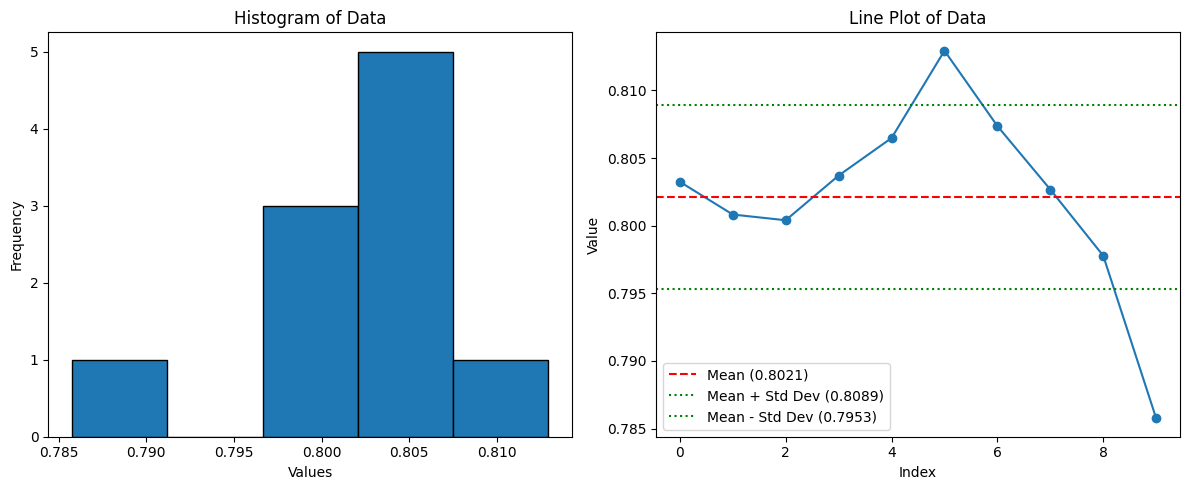

Average: 0.802118812576419
Standard Deviation: 0.006775338253554037
Minimum Value: 0.7857554730533003
Maximum Value: 0.8129399058434533


In [192]:
# Part 3
f1_list_30train_70test,accuracy_scores_list_30train_70test = train_and_test_data(X,y,test_size=0.3,train_size=0.7,number_of_loops=10)
find_the_f1_score_mean_and_standard_diviation(f1_list_30train_70test)




This is for 10.0% train and 90.0% test size data
The accuracy of my Naive Bayes Model is: 0.8173703598753188
The F1 Score of my Naive Bayes Model is: 0.8151016552719816

The accuracy of my Naive Bayes Model is: 0.8050439217908756
The F1 Score of my Naive Bayes Model is: 0.8013710729349983

The accuracy of my Naive Bayes Model is: 0.7717483706432418
The F1 Score of my Naive Bayes Model is: 0.7566497062944392

The accuracy of my Naive Bayes Model is: 0.8114196656276566
The F1 Score of my Naive Bayes Model is: 0.8089599529000628

The accuracy of my Naive Bayes Model is: 0.7948427316520261
The F1 Score of my Naive Bayes Model is: 0.7871846009072523

The accuracy of my Naive Bayes Model is: 0.8036270898271465
The F1 Score of my Naive Bayes Model is: 0.7993644436478288

The accuracy of my Naive Bayes Model is: 0.8152451119297252
The F1 Score of my Naive Bayes Model is: 0.8126642631315559

The accuracy of my Naive Bayes Model is: 0.8114196656276566
The F1 Score of my Naive Bayes Model is: 0

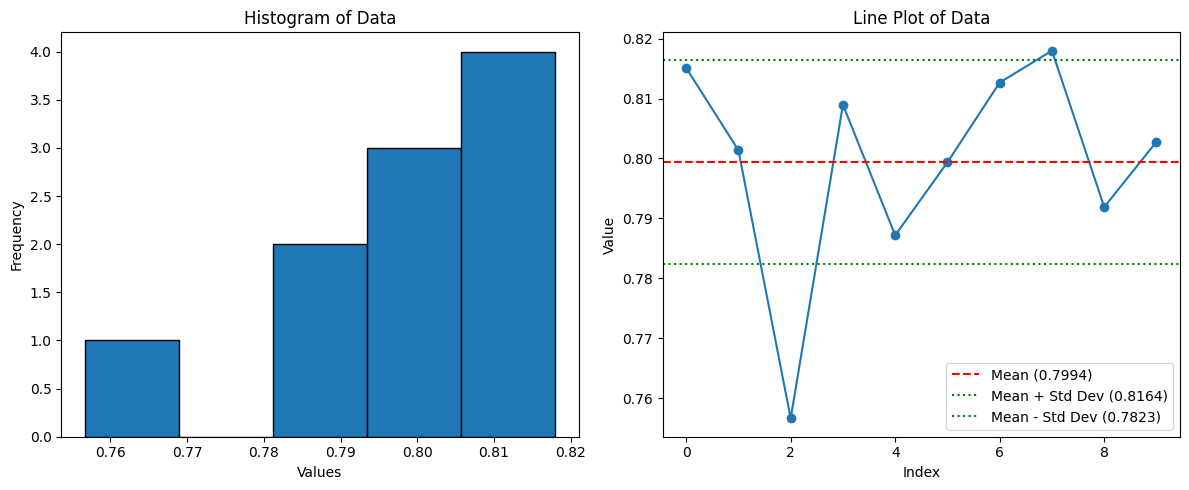

Average: 0.7993954117554848
Standard Deviation: 0.01705064701866871
Minimum Value: 0.7566497062944392
Maximum Value: 0.8179715978249007


This is for 20.0% train and 80.0% test size data
The accuracy of my Naive Bayes Model is: 0.8131973222824355
The F1 Score of my Naive Bayes Model is: 0.8091332537547204

The accuracy of my Naive Bayes Model is: 0.8101689512272873
The F1 Score of my Naive Bayes Model is: 0.805392607689718

The accuracy of my Naive Bayes Model is: 0.7927956646477526
The F1 Score of my Naive Bayes Model is: 0.7819285831658708

The accuracy of my Naive Bayes Model is: 0.8080969078737648
The F1 Score of my Naive Bayes Model is: 0.8034873206992229

The accuracy of my Naive Bayes Model is: 0.8006056742110297
The F1 Score of my Naive Bayes Model is: 0.7927265182717024

The accuracy of my Naive Bayes Model is: 0.8061842524705132
The F1 Score of my Naive Bayes Model is: 0.8013370794131307

The accuracy of my Naive Bayes Model is: 0.8127191584316226
The F1 Score of my Naive Bay

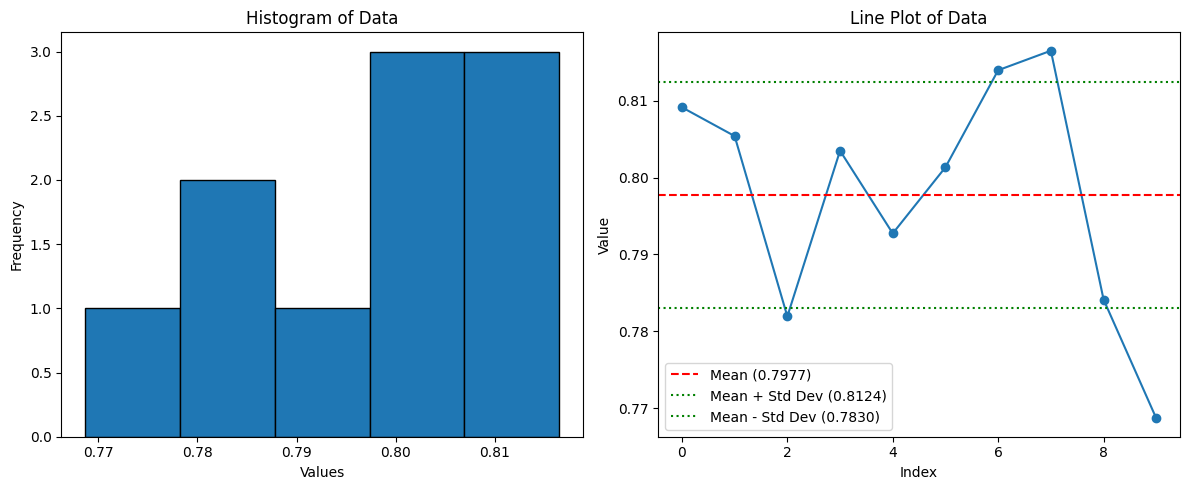

Average: 0.7977254606343361
Standard Deviation: 0.014680445509240582
Minimum Value: 0.7686666542564624
Maximum Value: 0.8164980548534871


This is for 30.000000000000004% train and 70.0% test size data
The accuracy of my Naive Bayes Model is: 0.807832422586521
The F1 Score of my Naive Bayes Model is: 0.8028292628473486

The accuracy of my Naive Bayes Model is: 0.8142076502732241
The F1 Score of my Naive Bayes Model is: 0.8127617688559173

The accuracy of my Naive Bayes Model is: 0.7989071038251366
The F1 Score of my Naive Bayes Model is: 0.7892208615247961

The accuracy of my Naive Bayes Model is: 0.8052823315118397
The F1 Score of my Naive Bayes Model is: 0.8000397802906557

The accuracy of my Naive Bayes Model is: 0.7941712204007286
The F1 Score of my Naive Bayes Model is: 0.7858629287053994

The accuracy of my Naive Bayes Model is: 0.8034608378870673
The F1 Score of my Naive Bayes Model is: 0.7970106567179929

The accuracy of my Naive Bayes Model is: 0.8063752276867031
The F1 Score 

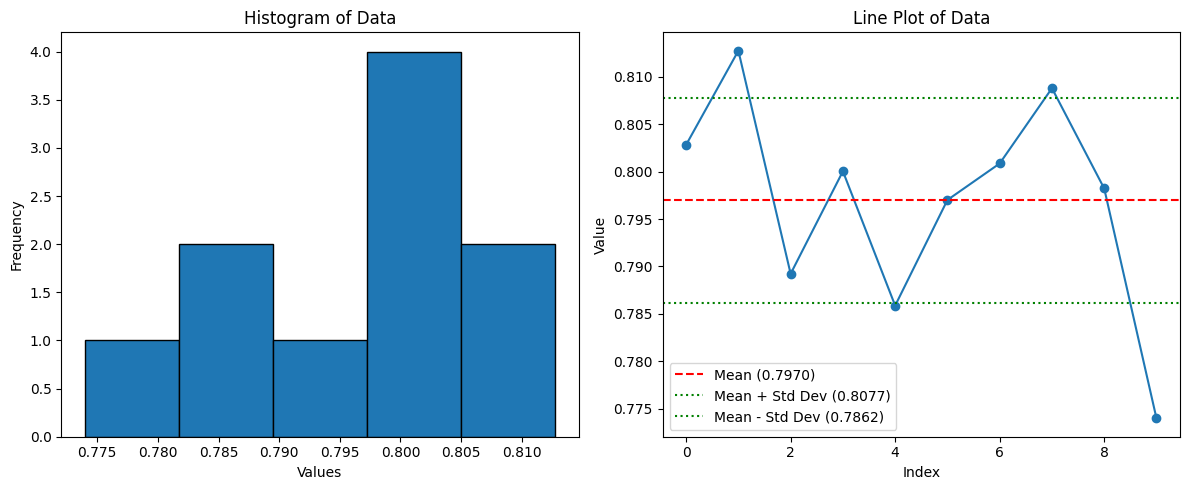

Average: 0.7969587378775663
Standard Deviation: 0.010781445727076682
Minimum Value: 0.7739692909195164
Maximum Value: 0.8127617688559173


This is for 40.0% train and 60.0% test size data
The accuracy of my Naive Bayes Model is: 0.8093922651933702
The F1 Score of my Naive Bayes Model is: 0.806578856022873

The accuracy of my Naive Bayes Model is: 0.810667233319167
The F1 Score of my Naive Bayes Model is: 0.8084858055696689

The accuracy of my Naive Bayes Model is: 0.8123671908202295
The F1 Score of my Naive Bayes Model is: 0.8058344570679427

The accuracy of my Naive Bayes Model is: 0.8136421589460263
The F1 Score of my Naive Bayes Model is: 0.8102596597427971

The accuracy of my Naive Bayes Model is: 0.8008924776880578
The F1 Score of my Naive Bayes Model is: 0.7942485917917564

The accuracy of my Naive Bayes Model is: 0.8079048023799406
The F1 Score of my Naive Bayes Model is: 0.8029754533561856

The accuracy of my Naive Bayes Model is: 0.8110922226944326
The F1 Score of my Naive Bay

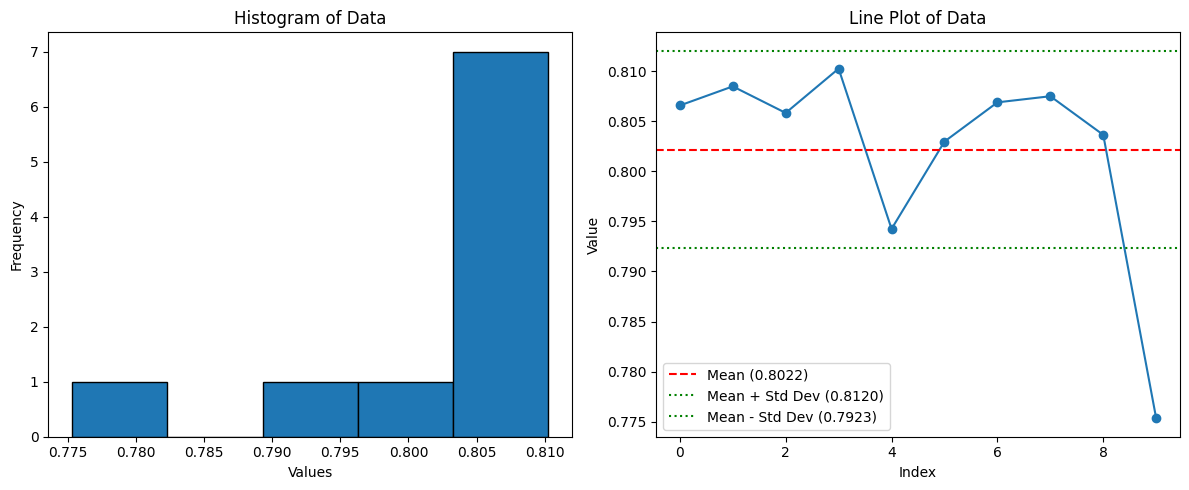

Average: 0.8021747988805377
Standard Deviation: 0.009874294596854382
Minimum Value: 0.775327404635818
Maximum Value: 0.8102596597427971


This is for 50.0% train and 50.0% test size data
The accuracy of my Naive Bayes Model is: 0.8120377454730936
The F1 Score of my Naive Bayes Model is: 0.8102757030432839

The accuracy of my Naive Bayes Model is: 0.8074470798265748
The F1 Score of my Naive Bayes Model is: 0.8042262554686832

The accuracy of my Naive Bayes Model is: 0.8082121907676613
The F1 Score of my Naive Bayes Model is: 0.8019273298183517

The accuracy of my Naive Bayes Model is: 0.8138230043356287
The F1 Score of my Naive Bayes Model is: 0.8098938208810659

The accuracy of my Naive Bayes Model is: 0.8041315990818668
The F1 Score of my Naive Bayes Model is: 0.7984348611330524

The accuracy of my Naive Bayes Model is: 0.8145881152767152
The F1 Score of my Naive Bayes Model is: 0.8096630638869212

The accuracy of my Naive Bayes Model is: 0.8166284111196124
The F1 Score of my Naive Ba

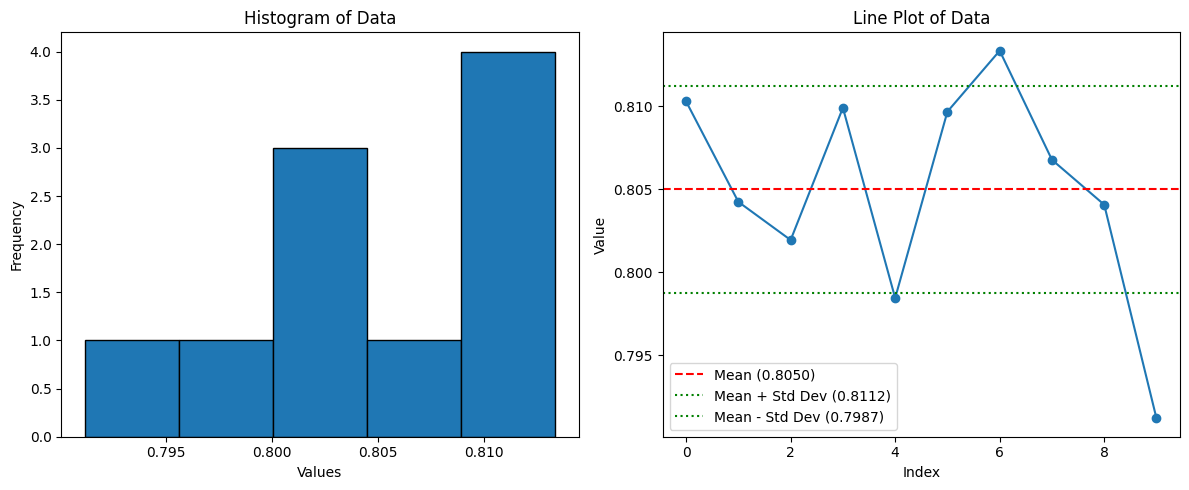

Average: 0.8049755294557974
Standard Deviation: 0.0062526653789845964
Minimum Value: 0.7911843594887092
Maximum Value: 0.8133327581706697


This is for 60.00000000000001% train and 39.99999999999999% test size data
The accuracy of my Naive Bayes Model is: 0.810965890978642
The F1 Score of my Naive Bayes Model is: 0.807382413388274

The accuracy of my Naive Bayes Model is: 0.8058654765699713
The F1 Score of my Naive Bayes Model is: 0.802225015747076

The accuracy of my Naive Bayes Model is: 0.8090532355753906
The F1 Score of my Naive Bayes Model is: 0.8028727145231253

The accuracy of my Naive Bayes Model is: 0.8052279247688875
The F1 Score of my Naive Bayes Model is: 0.7992656921659985

The accuracy of my Naive Bayes Model is: 0.8052279247688875
The F1 Score of my Naive Bayes Model is: 0.8020833148695803

The accuracy of my Naive Bayes Model is: 0.8157475294867708
The F1 Score of my Naive Bayes Model is: 0.8100939604128419

The accuracy of my Naive Bayes Model is: 0.8131973222824355
Th

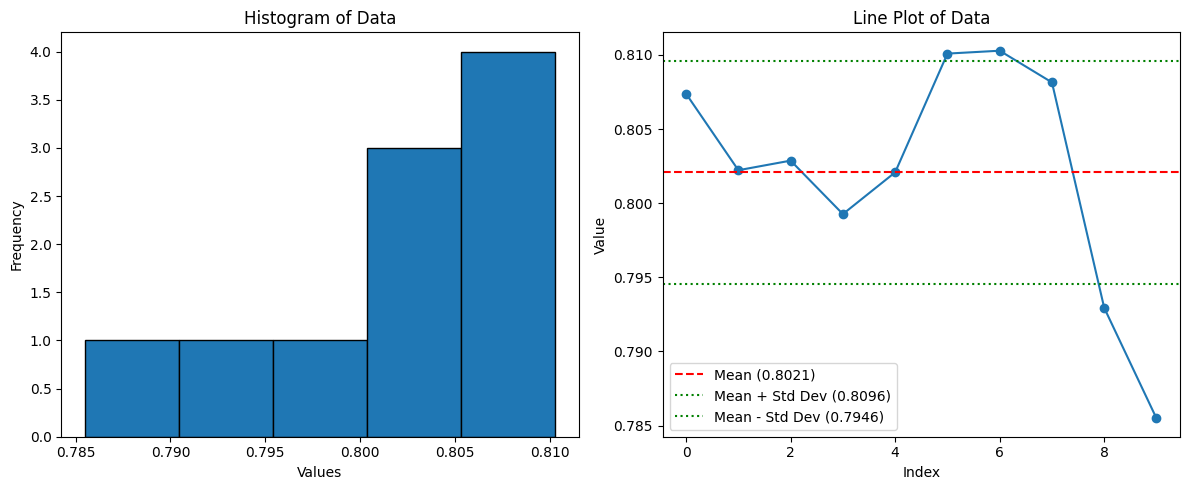

Average: 0.8020784478533727
Standard Deviation: 0.007510935556298278
Minimum Value: 0.7854835353934422
Maximum Value: 0.8102884332069071


This is for 70.0% train and 29.999999999999993% test size data
The accuracy of my Naive Bayes Model is: 0.8070548236294093
The F1 Score of my Naive Bayes Model is: 0.8032470978654022

The accuracy of my Naive Bayes Model is: 0.8032299192520187
The F1 Score of my Naive Bayes Model is: 0.8008261080107959

The accuracy of my Naive Bayes Model is: 0.8070548236294093
The F1 Score of my Naive Bayes Model is: 0.8004029641340095

The accuracy of my Naive Bayes Model is: 0.8091797705057373
The F1 Score of my Naive Bayes Model is: 0.8037085098610283

The accuracy of my Naive Bayes Model is: 0.809604759881003
The F1 Score of my Naive Bayes Model is: 0.8064841714114075

The accuracy of my Naive Bayes Model is: 0.8176795580110497
The F1 Score of my Naive Bayes Model is: 0.8129399058434533

The accuracy of my Naive Bayes Model is: 0.809604759881003
The F1 Score o

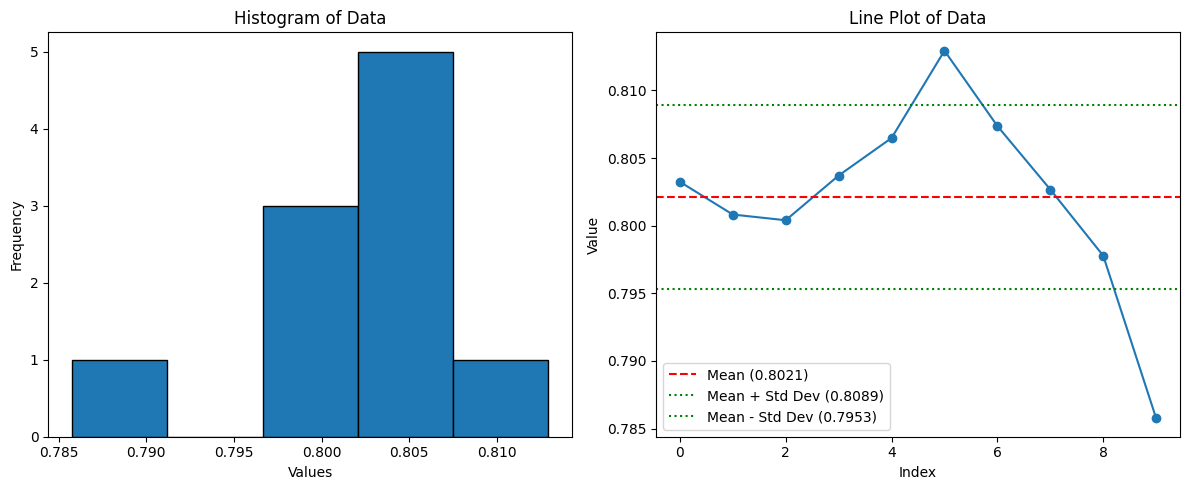

Average: 0.802118812576419
Standard Deviation: 0.006775338253554037
Minimum Value: 0.7857554730533003
Maximum Value: 0.8129399058434533


In [193]:
# Part 4
def train_multiple_nivebase_bayes_classifier(number_of_classifier):
    for index in range(1,number_of_classifier):
        print("\n")
        print(f"This is for {(0.1*index)*100}% train and {(1-0.1*index)*100}% test size data")
        f1_list,accuracy_scores = train_and_test_data(X,y,test_size=1-0.1*index,train_size=0.1*index,number_of_loops=10)
        find_the_f1_score_mean_and_standard_diviation(f1_list)
# We need to test for 8 times
train_multiple_nivebase_bayes_classifier(8)